### Kelime Sayma

Bir kelime diğer hangi kelimenin yanında bulunuyor diye sayarak matrix'e dönüştürebiliriz.
- **2 Seçenekli** : Window(pencere) vs Full Document
- **Window** : Word2Vec'e benzer. Kelimenin etrafında pencere oluşturur ve kelimeleri sayar.
- **Document** : Dökümanlar içerisinde geçen kelimeleri sayarak dökümanlar hakkında genel bir fikit edinilebilir. (Letent Semantic Analysis)

https://edisciplinas.usp.br/pluginfile.php/4848804/mod_resource/content/6/NLP_Intro%2BGlove.pdf

- **Sayma Yöntemi ile İlgili Problemler**
- Kelime sayısı arttıkça boyut da artar.
- Boyutu çok büyük olduğu için çok fazla hafızaya ihtiyaç duyar.
- **Çözüm**
- Önemli bilgilerin çoğunu belirli boyuttaki küçük bir vektörde sakla.
- Vektörer genelde 25-1000 boyutlu...
- **Örnek**
- Eğer corpus'ta 50000 kelime varsa,50000'e 50000 boyutunda bir matrix elde edilir.
- Böyle büyük boyuta sahip bir matrix'in boyutunu düşürmek için LC'deki SVD(Singular Value Decompositon) kullanılabilir.



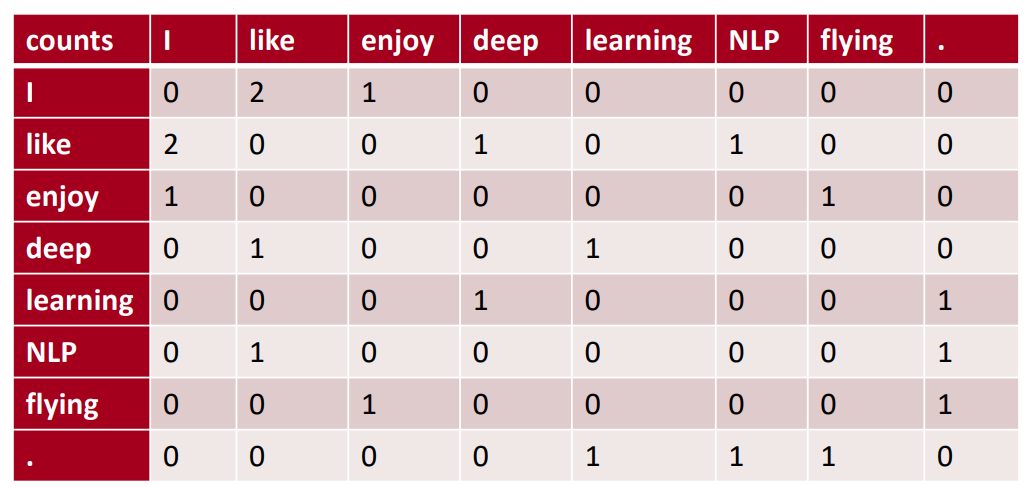

**SVD(Singular Value Decomposition)**

In [ ]:
# Python'da SVD
  # Corpus: I like deep learning. I like NLP. I enjoy flying.

import numpy as np
la = np.linalg
words = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]
X = np.array(
    [
        [0, 2, 1, 0, 0, 0, 0, 0],
        [2, 0, 0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 1, 0]
    ]
)
U, s, Vh = la.svd(X, full_matrices=False)

**SVD'nin Karşılaşacağı Problemler**
- Milyonlarca kelime için verimli değil.
- Matrix büyüdükçe(kelime sayısına bağlı olarak) CP yükü fazla olur.
- Deep Learning tabanlı değil.

*CP = Computational Power

## **GloVe -> Global Vectors**
- Eğitimi hızlı.
- Çok büyük corpus'lar için de kullanılabilir.
- Küçük corpus'larda ve küçük vektörlerde iyi performans sağlar.

## **Skip-fram vs. GloVe**
- Word2Vec (skip-gram) metni kelime-kelime gezerek iki kelimenin ne kadar sık yanyana geçtiğini hesaplar.
- GloVe, iki kelimenin ne kadar sık yanyana geçtiğinin istatistiğini çıkarır.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec      # Glove formatındaki dosyayı Word2Vec formatına çevireceğiz.
from gensim.models import KeyedVectors                        # Modeli yüklemek için kullanacağız.

In [ ]:
glove_input = "glove.6B.100d.txt"   # 6B = 6 milyar token üzerinden eğitildi.
                                    # 100B = Vektörler 100 boyutlu.

word2vec_output = "glove.6B.100d.word2vec"
glove2word2vec(glove_input, word2vec_output)

# Kelime Sayısı                 : 400000
# Her Kelimenin Vektör Boyutu   : 100

<ipython-input-3-d68cfe17138a>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, word2vec_output)


(384378, 100)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)

# binary=False    : Dosya binary değil, text formatında. Bu nedenle değeri False bıraktık.

In [ ]:
model["istanbul"]

array([ 0.40378  ,  0.019734 , -0.15499  , -0.26948  ,  0.33938  ,
        0.46476  , -0.53141  ,  0.094519 ,  0.45399  ,  1.3385   ,
        0.18271  , -0.3465   ,  0.28323  ,  0.70829  , -0.75002  ,
        0.016359 , -0.64514  , -0.54882  , -0.75309  , -0.21617  ,
        0.13678  , -0.25198  , -0.037552 ,  0.35938  , -0.33532  ,
       -0.78733  ,  0.10907  , -0.13902  ,  0.53454  ,  0.58805  ,
       -1.1348   , -0.14574  ,  0.20244  ,  0.81909  , -0.27482  ,
        0.14045  ,  0.68814  ,  0.70236  , -0.34211  , -0.62128  ,
       -0.10601  , -0.62413  ,  0.30536  , -0.44325  ,  0.64016  ,
        0.0020673,  0.88252  ,  0.050356 , -0.35739  ,  0.54686  ,
        0.11974  , -0.12593  ,  0.74211  ,  0.65482  , -1.4018   ,
       -1.1218   , -0.21188  ,  0.35338  ,  0.53459  ,  0.20205  ,
       -0.86132  ,  0.82773  , -0.10065  , -0.19766  , -0.85631  ,
        0.27891  , -1.3381   ,  0.19368  , -0.70602  ,  0.067972 ,
       -0.80953  , -0.65974  ,  0.50856  , -0.020009 , -0.7665

In [ ]:
model.most_similar("shark")

[('whale', 0.7840168476104736),
 ('dolphin', 0.7335216403007507),
 ('crocodile', 0.6806946396827698),
 ('fish', 0.657819390296936),
 ('sharks', 0.6473532319068909),
 ('turtle', 0.6445284485816956),
 ('monkey', 0.6254796385765076),
 ('elephant', 0.6209661960601807),
 ('swordfish', 0.619266927242279),
 ('alligator', 0.6062195897102356)]

In [ ]:
model.most_similar("monkey")

[('cat', 0.7288709878921509),
 ('monkeys', 0.7264204621315002),
 ('mouse', 0.6769240498542786),
 ('ape', 0.6653543710708618),
 ('squirrel', 0.6539694666862488),
 ('spider', 0.6474378705024719),
 ('elephant', 0.6434566974639893),
 ('rat', 0.6417514085769653),
 ('snake', 0.638135552406311),
 ('pig', 0.6356362104415894)]

In [ ]:
model.most_similar("pokemon")

[('godzilla', 0.6262005567550659),
 ('myst', 0.6097521185874939),
 ('collectible', 0.6047139167785645),
 ('pokémon', 0.5571379065513611),
 ('tetris', 0.5570507645606995),
 ('frogger', 0.5553606152534485),
 ('tamagotchi', 0.5479309558868408),
 ('pinball', 0.5230490565299988),
 ('bambi', 0.52082359790802),
 ('nintendo', 0.5188888311386108)]

(king-man) + woman = queen

In [ ]:
model.most_similar(positive=["woman", "king"], negative=["man"], topn=1)

[('queen', 0.7698540687561035)]

In [ ]:
model.most_similar(positive=["woman", "father"], negative=["man"], topn=1)

[('mother', 0.9024619460105896)]

In [ ]:
model.most_similar(positive=["woman", "son"], negative=["man"], topn=1)

[('daughter', 0.9090957641601562)]

In [ ]:
model.most_similar(positive=["berlin", "turkey"], negative=["ankara"], topn=1)

[('germany', 0.8284542560577393)]